In [59]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# Parameter for the learning
learning_rate = 0.01
num_epoch  = 1000

In [61]:
# Create the dataset
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
print(train_X.shape)
print(train_Y.shape)

n_samples = train_X.shape[0]

(17,)
(17,)


In [62]:
# TF input placeholders
X = tf.placeholder('float')
Y = tf.placeholder('float')

# Initialize the Model variables
W = tf.Variable(np.random.randn(), name='weight')
B = tf.Variable(np.random.randn(), name='bias')

In [63]:
# The Linear Model
pred = tf.add(tf.multiply(X, W), B)

In [64]:
# Cost function
costFunc = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(costFunc)

In [65]:
# Initialize the variables
init = tf.global_variables_initializer()

Optimization is done
Traning cost: 0.10642814 W:  0.34564286 B:  0.1104946


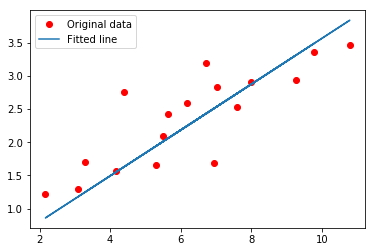

In [66]:
# Training
with tf.Session() as sess:
    # First initialize the variables (W and B)
    sess.run(init)
    
    # Running the optimizer
    for epoch in range(0, num_epoch):
        for x, y in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
    
    print('Optimization is done')
    traning_cost = sess.run(costFunc, feed_dict={X: train_X, Y: train_Y})
    print('Traning cost:', traning_cost, 'W: ', sess.run(W), 'B: ', sess.run(B))
    
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(B), label='Fitted line')
    plt.legend()
    plt.show()